<a href="https://colab.research.google.com/github/rajendran-official/AI_ML_COURSE_ICT/blob/Dataset-Preprocessing-Assignment/Dataset_Preprocessing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('/content/Bengaluru_House_Data.csv')

In [50]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [51]:
print("Dataset shape:", df.shape)

Dataset shape: (13320, 9)


**Identify and Treat Missing Values in `society` Column**

In [52]:
print(df.isnull().sum())

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


Fill missing society


In [53]:
society = df['society'].isnull().sum()

In [54]:
total_rows = len(df)

In [55]:
print(f"Total rows: {total_rows}")

Total rows: 13320


In [56]:
print(f"Missing values in society: {society}")

Missing values in society: 5502


In [57]:
print(f"Percentage missing: {round(society / total_rows * 100, 2)}%")

Percentage missing: 41.31%


### 1. Treat Missing Values in society Column

**Strategy Chosen:**  
Fill missing society with the **most common society in the same location**.  
If no society found for that location → fill with **'Unknown'**.

**Justification**
- Society means apartment/project name.
- Same area (location) usually has same society name.
- Filling with one society for ALL missing would be wrong.
- This way is smarter and more correct.

In [58]:
df['location'] = df['location'].str.strip()

In [59]:
location_mode = df.groupby('location')['society'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

In [60]:
# Function to fill missing society
def fill_society(row):
    if pd.isnull(row['society']):
        loc = row['location']
        if loc in location_mode.index and pd.notnull(location_mode[loc]):
            return location_mode[loc]
        else:
            return 'Unknown'
    else:
        return row['society']

In [61]:
df['society'] = df.apply(fill_society, axis=1)

In [62]:
print("Missing values in society after filling:", df['society'].isnull().sum())

Missing values in society after filling: 0


In [63]:
  print("Number of 'Unknown':", (df['society'] == 'Unknown').sum())

Number of 'Unknown': 1411


In [64]:
df[['location', 'society', 'price']].head(20)

,location,society,price
0,Electronic City Phase II,Coomee,39.07
1,Chikka Tirupathi,Theanmp,120.00
2,Uttarahalli,Aklia R,62.00
3,Lingadheeranahalli,Soiewre,95.00
4,Kothanur,Somumys,51.00
5,Whitefield,DuenaTa,38.00
6,Old Airport Road,Jaades,204.00
7,Rajaji Nagar,Brway G,600.00
8,Marathahalli,PueraRi,63.25
9,Gandhi Bazar,Unknown,370.00


In [65]:
df[['location', 'society', 'price']].head(20)

,location,society,price
0,Electronic City Phase II,Coomee,39.07
1,Chikka Tirupathi,Theanmp,120.00
2,Uttarahalli,Aklia R,62.00
3,Lingadheeranahalli,Soiewre,95.00
4,Kothanur,Somumys,51.00
5,Whitefield,DuenaTa,38.00
6,Old Airport Road,Jaades,204.00
7,Rajaji Nagar,Brway G,600.00
8,Marathahalli,PueraRi,63.25
9,Gandhi Bazar,Unknown,370.00


**2. Check Outliers in price Column**

**Method Used:** IQR Method

**Steps:**
1. Find Q1 (25% value) and Q3 (75% value)
2. IQR = Q3 - Q1
3. Upper limit = Q3 + 1.5 × IQR
4. Any price above this = outlier

**Justification:**
IQR is robust — it uses quartiles (25% and 75%), doesn't assume any shape, and is perfect for skewed data like property prices.

In [66]:
plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Price Boxplot (Outliers are dots on the right)')

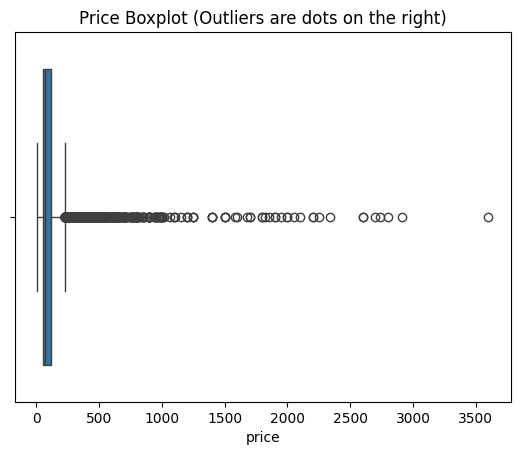

In [67]:
# Boxplot to see outliers
sns.boxplot(x=df['price'])
plt.title('Price Boxplot (Outliers are dots on the right)')

In [68]:
plt.show()

In [69]:
# Calculate IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

In [70]:
upper_limit = Q3 + 1.5 * IQR

In [71]:
print(f"Q1 (25%): {Q1} Lakhs")

Q1 (25%): 50.0 Lakhs


In [72]:
print(f"Q3 (75%): {Q3} Lakhs")

Q3 (75%): 120.0 Lakhs


In [73]:
print(f"IQR: {IQR} Lakhs")

IQR: 70.0 Lakhs


In [74]:
print(f"Upper limit for outliers: {upper_limit} Lakhs")

Upper limit for outliers: 225.0 Lakhs


In [75]:
outliers = df[df['price'] > upper_limit]

In [76]:
# Find outliers
print(f"\nNumber of outliers: {len(outliers)}")


Number of outliers: 1276


In [77]:
#top 10 most expensive outliers
outliers[['location', 'society', 'size', 'price']].sort_values('price', ascending=False).head(10)

,location,society,size,price
13067,Defence Colony,Inshath,10 Bedroom,3600.0
11080,Ashok Nagar,Unknown,4 BHK,2912.0
13200,Defence Colony,Inshath,6 Bedroom,2800.0
11763,Sadashiva Nagar,Unknown,5 Bedroom,2736.0
3180,Shanthala Nagar,Kierser,5 BHK,2700.0
13197,Ramakrishnappa Layout,PeBayle,4 Bedroom,2600.0
12443,Dollars Colony,Koowsis,4 Bedroom,2600.0
10304,5th Block Jayanagar,Unknown,4 Bedroom,2340.0
6421,Bommenahalli,Prood G,4 Bedroom,2250.0
408,Rajaji Nagar,PhestOn,7 BHK,2200.0


**3. Final Cleaning - Drop Outliers**

**Justification**

These are very expensive houses (luxury). They make the model confused when predicting normal house prices. Removing them helps the model learn better for regular homes.

In [78]:
# Create cleaned dataset (remove price outliers)
df_cleaned = df[df['price'] <= upper_limit].copy()

In [79]:
print("Original rows:", len(df))

Original rows: 13320


In [80]:
print("Outliers removed:", len(outliers))

Outliers removed: 1276


In [81]:
print("Final cleaned rows:", len(df_cleaned))

Final cleaned rows: 12044


In [82]:
df_cleaned.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Somumys,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,PueraRi,1310,3.0,1.0,63.25
10,Super built-up Area,18-Feb,Whitefield,3 BHK,Prtates,1800,2.0,2.0,70.00
12,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,Shncyes,1000,2.0,1.0,38.00
